## Numpy

In [2]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [25]:
import random

In [35]:
%%timeit
[i + 1 for i in [random.randint(0,100) for i in range(10000)]]

35.2 ms ± 6.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
np.random.randint(100, size=(10000)) + 1

315 µs ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [41]:
from math import sin, cos
tab = [random.randint(0,100) for i in range(10000)]
arr = np.array(tab)

In [42]:
%%timeit
[sin(x) + cos(x) for x in tab]

11.5 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%%timeit
np.sin(arr) + np.cos(arr)

886 µs ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [46]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [118]:
def cube_sum_numpy(x):
    """Zwraca sume szescianow elementow"""
    return np.sum(x**3)

def almost_variance_numpy(x):
    """Oblicza 1/n * SUM ((x_i - mean(x))^4)"""
    return np.sum((x - np.mean(x))**4) / x.size

In [119]:
tab = [random.randint(0,100) for i in range(1000)]
arr = np.array(tab)

In [120]:
print(cube_sum(tab))
print(cube_sum_numpy(arr))

print(almost_variance(tab))
print(almost_variance_numpy(arr))

276063330
276063330
1336453.2343719115
1336453.2343719099


In [121]:
%%timeit
cube_sum(tab)

304 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [122]:
%%timeit
cube_sum_numpy(arr)

7.82 µs ± 121 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [123]:
%%timeit
almost_variance(tab)

258 µs ± 4.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [124]:
%%timeit
almost_variance_numpy(arr)

58.8 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [117]:
np.arange(11).reshape((11,1)) * np.arange(11)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [8]:
vec = np.random.rand(10,5)
dist = ((vec[:, None] - vec[:, :, None]) ** 2).sum(0)
print(vec)
print(vec[:,None])
print(vec[:, :, None])

[[0.6892758  0.24993345 0.40942614 0.77422342 0.215625  ]
 [0.10798052 0.50754861 0.98648324 0.09409129 0.89857683]
 [0.54985433 0.80679781 0.76673145 0.60006925 0.2953006 ]
 [0.33100686 0.87966316 0.03689189 0.96600349 0.17153305]
 [0.98101673 0.91606793 0.32114332 0.46153721 0.85736326]
 [0.43377294 0.91943036 0.75049744 0.07071681 0.57723494]
 [0.67754976 0.416182   0.30329069 0.85298666 0.35098227]
 [0.92056926 0.235346   0.88296735 0.97396099 0.27278868]
 [0.93012025 0.03422696 0.67919316 0.43962057 0.12633895]
 [0.81826056 0.08488717 0.40835346 0.44863478 0.73176309]]
[[[0.6892758  0.24993345 0.40942614 0.77422342 0.215625  ]]

 [[0.10798052 0.50754861 0.98648324 0.09409129 0.89857683]]

 [[0.54985433 0.80679781 0.76673145 0.60006925 0.2953006 ]]

 [[0.33100686 0.87966316 0.03689189 0.96600349 0.17153305]]

 [[0.98101673 0.91606793 0.32114332 0.46153721 0.85736326]]

 [[0.43377294 0.91943036 0.75049744 0.07071681 0.57723494]]

 [[0.67754976 0.416182   0.30329069 0.85298666 0.3509

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [15]:
arr = np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])
def white(x):
    return (arr - arr.mean(0)) / arr.std(0)
white(white(arr))

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [28]:
def closest(x, arr):
    idx = np.abs(np.array(arr) - x).argmin()
    return arr[idx]

closest(1.5, [-4.3, 1])

1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [43]:
def poly(x, a) :
    return np.sum(a[1:] * np.cumprod(np.full((1, len(a) - 1), x))) + a[0]

coeffs = np.array([1, -3, 2])  # represents the polynomial 1 -3x + 2x^2
x = 2
poly(x_value, coefficients)

3

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

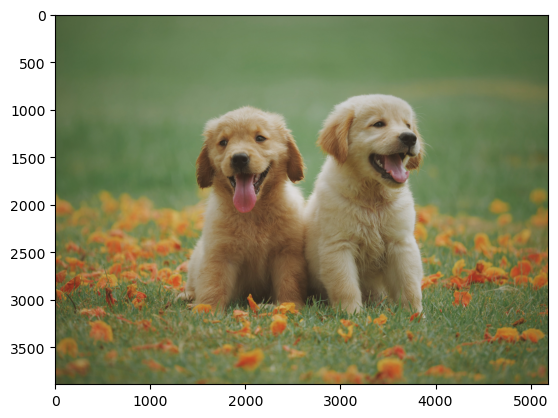

In [60]:
img = mpimg.imread("images/doggos.jpg")
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

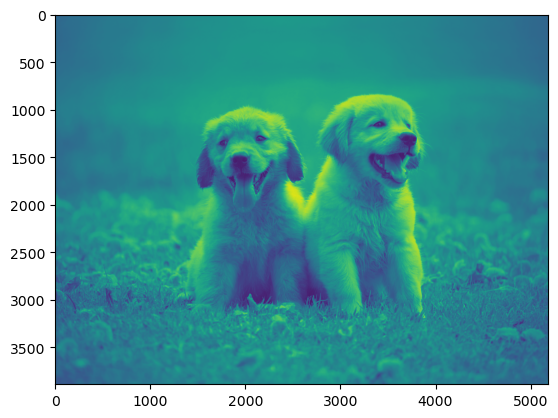

In [63]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2126, 0.7152, 0.0722])
plt.imshow(rgb2gray(img))

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [72]:
def interpolate(x1, x2, lam):
    return x1 * lam[:, np.newaxis] + x2 * (1 - lam)[:, np.newaxis]

x1 = np.array([1, 2])
x2 = np.array([4, 6])
lam_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1])

interpolate(x1, x2, lam_values)

array([[3.7, 5.6],
       [3.4, 5.2],
       [3.1, 4.8],
       [2.8, 4.4],
       [2.5, 4. ],
       [1.6, 2.8],
       [1. , 2. ]])